# 02.Neuronal Network Classification with PyTorch

Classsification is a problem of prediction wheter somethint is one thing or another (there can be multiple things as the option)



## Make classification data and get it ready 

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

In [3]:
# make 1000 samples
n_samples = 1000
# Create circles
X, y = make_circles(
                    n_samples=n_samples,
                    noise=0.03,
                    random_state = 42
                    )

In [4]:
len(X), len (y)

(1000, 1000)

In [5]:
# First five samples of X and y
print(X[:5])
print(y[:5])


[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
[1 1 1 1 0]


In [6]:
# Make a dataframe of circle data
import pandas as pd
circles = pd.DataFrame(
    {
     'X1':X[:,0],
     'X2':X[:,1],
     'label':y
     }
     )

In [7]:
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [8]:
# Visualize, Visualize, visualize
import matplotlib.pyplot as plt

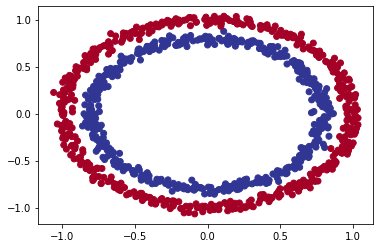

In [9]:
plt.scatter(
    x=X[:,0],
    y=X[:,1],
    c=y,
    cmap=plt.cm.RdYlBu)

Nothe: the data we´re working with is often referred to as a toy dataset, a dataset that is samll enough to experiment but still sizeable to practice the foundamental.

### 1.1 Check input and output shapes

In [10]:
X.shape, y.shape

((1000, 2), (1000,))

In [11]:
# View the first example of features an labels
X_sample = X[0]
y_sample = y[0]

print(f'Values of one sample of X and y: {X_sample} --- {y_sample}')
print(f'Shapes   of one sample of X and y: {X_sample.shape} --- {y_sample.shape}')


Values of one sample of X and y: [0.75424625 0.23148074] --- 1
Shapes   of one sample of X and y: (2,) --- ()


### 1.2 Turn data into tensors and create train test split




In [12]:
# Turn data into tensors
import torch
# Check PyTorch version
print(torch.__version__)

X_tensor = torch.from_numpy(X).type(torch.float32)
y_tensor = torch.from_numpy(y).type(torch.float32)

print(X_tensor[:5], y_tensor[:5])
print(f'Tensor shape {X_tensor.shape}, {y_tensor.shape}')
print(f'Tensor type {X_tensor.dtype}, {y_tensor.dtype}')



1.12.1+cu113
tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]]) tensor([1., 1., 1., 1., 0.])
Tensor shape torch.Size([1000, 2]), torch.Size([1000])
Tensor type torch.float32, torch.float32


In [13]:
# Split data into train-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tensor,
                                                    y_tensor,
                                                    test_size=0.2, # 
                                                    random_state=42)

In [14]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model
Let´s build a model to classify our blue and red docstrings
To do so, we want to:
1. Setup device agnostic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassinf 'nn.Module')
3. Definea loss function and OptimizeResult
4. Create a train test loop

In [15]:
# Import PyTorch nn
from torch import nn
# Agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

Now we´ve setup device agnostic code, let´s create a model that:

1. Subclass 'nn.Module'
2. Create 2 'nn.Linear()' layers that are capable of handling the shapes of our data
3. Defines a forward() method that outlines de forward pass of the model
4. Instatiate an instance of our model and send it to the target device

In [16]:
# 1. Construct the model that subclasses nn.Module

class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(
                             in_features = 2,
                             out_features = 5,
                             )
    self.layer_2 = nn.Linear(
                            in_features = 5,
                            out_features = 1
                             )
    # 3. Define a forward() method taht outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x --> layer_1 --> layer_2 --> output

# 4. Instantiate a instance of our model class and send it to the target device
model_0 = CircleModelV1().to(device)
model_0

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
print(device)
print(next(model_0.parameters()).device)


cpu
cpu


In [18]:
# Let´s replicate the model above usign nn.Sequential()

model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)
model_1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
# Look the random weights that PyTorch creates.
model_0.state_dict()

OrderedDict([('layer_1.weight', tensor([[ 0.2781,  0.5078],
                      [-0.3873, -0.5109],
                      [ 0.5084, -0.4238],
                      [ 0.1357,  0.2671],
                      [-0.0484, -0.0012]])),
             ('layer_1.bias',
              tensor([-0.1722, -0.0524,  0.6879, -0.4185, -0.5673])),
             ('layer_2.weight',
              tensor([[ 0.1671,  0.0881, -0.1662,  0.3596, -0.2828]])),
             ('layer_2.bias', tensor([-0.2830]))])

In [20]:
# Make some predictions with our model
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f'Lenght of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}')
print(f'Lenght of test samples: {len(X_test)}, Shape: {X_test.shape}')
print(f'First 10 predictions : {torch.round(untrained_preds[:10])}')
print(f'First 10 labels : {y_test[:10]}')


Lenght of predictions: 200, Shape: torch.Size([200, 1])
Lenght of test samples: 200, Shape: torch.Size([200, 2])
First 10 predictions : tensor([[-0.],
        [-0.],
        [-0.],
        [-0.],
        [-1.],
        [-1.],
        [-0.],
        [-0.],
        [-0.],
        [-0.]])
First 10 labels : tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup a loss function and optimizer

Which loss function or opotimizer should you use?

Again ... this is a problem setup

For example for regression you might use MAE or MSE (mean absolute error or mean squared error)

For classification you might use binary cross entropy or categorical cross entropy



In [21]:
# Define the loss function
#loss_func = nn.BCELoss # Requires inputs tot have go through an sigmoid function previous.

loss_func = nn.BCEWithLogitsLoss() # Sigmoid activation function built-in it is better than a BCELoss + sigmoid.

# Define an Optimizer
optimizer = torch.optim.Adam(
    params=model_1.parameters(),                 
)

In [22]:
# Calculate accuracy - out of 100 examples, what percentage doues our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  
  acc = (correct/len(y_pred)) * 100
  return acc

### Train Model

To train our model, we are going to need to build a training loop

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward
5. Optimizer step

### 3.1 Goig from raw logits --> prediction probabilities --> prediction labels

Our model outputs are going to be a raw **logits**

We can convert these **logits** into prediction probabilities by passin them to some kind of activation function
(e.g. sigmoid for binary classification and softmax for multicalss clasificaction)

Then we can convert our model prediction probabilities to prediction labels by either rounding them or taking argmax()

In [23]:
# Views thhe first outputs of the forward pass on the test data
with torch.inference_mode():
  y_logits = model_1(X_test.to(device))

In [24]:
# Without passing through an activation function.
y_logits[:5]

tensor([[-0.4174],
        [-0.2404],
        [-0.6966],
        [-0.3391],
        [-0.4031]])

In [25]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [26]:
# Use the sigmoid activation function in our model logits to convert them into probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:5]

tensor([[0.3971],
        [0.4402],
        [0.3326],
        [0.4160],
        [0.4006]])

For our prediction probabilities values  we need to perfom a range-style rounding on them:
* y_pred_probs >= 0.5, y = 1 (class 1)
* y_pred_probs < 0.5, y = 0 (class 0)
You can also adjust this classification boundary to 0.6 or other values.

In [27]:
# Find the predicted labels and evaluate your model.
y_preds = torch.round(y_pred_probs[:5])

# In full get predicted labels by our models
y_pred_labels = torch.round(torch.sigmoid(model_1(X_test[:5].to(device))))
# Compare true labels vs predicted one
print(torch.eq(y_pred_labels.squeeze(),y_test[:5].squeeze()))
# Calculate model metric: Accuracy
accuracy_fn(y_true=y_test[:5], y_pred=y_pred_labels)



tensor([False,  True, False,  True, False])


200.0

In [28]:
%%time
# Number of epochs
EPOCHS = 200
# Seeds
torch.manual_seed(42)
# torch.cuda.manual_seed(42) in case of cuda, but it is not necesary.

# Agnostic
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Train

for epoch in range(EPOCHS):
  model_1.train()

  # 1.Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # Turn logits---> pred probs --> pred labels
 
  # 2.Calculate the accuracy/loss
  loss = loss_func(y_logits, y_train) ## Because our loss function applies sigmoid and then loss we have to pass logits instead labels.
  acc = accuracy_fn(y_true=y_train,y_pred=y_pred) 

  # 3.Make the zero grad
  optimizer.zero_grad()
  # 4. Loss bacward (backprogpagation)
  loss.backward()
  # 4.Step, step, step (gradient descent)
  optimizer.step()

  #Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the test_loss/accuracy
    test_loss = loss_func(test_logits,
                          y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)
    
    # Print what´s happening
    if epoch % 10 == 0:
      print(f' Epoch:{epoch} - Train_loss:{loss}- train_acc: {round(acc)} | test loss: {test_loss} - test acc: {round(test_acc)}') 

    


 Epoch:0 - Train_loss:0.7193821668624878- train_acc: 50 | test loss: 0.7263621687889099 - test acc: 50
 Epoch:10 - Train_loss:0.7150450348854065- train_acc: 50 | test loss: 0.7216295003890991 - test acc: 50
 Epoch:20 - Train_loss:0.7112287878990173- train_acc: 50 | test loss: 0.7174327373504639 - test acc: 50
 Epoch:30 - Train_loss:0.7079346179962158- train_acc: 49 | test loss: 0.7137753367424011 - test acc: 48
 Epoch:40 - Train_loss:0.7051249742507935- train_acc: 47 | test loss: 0.7106181383132935 - test acc: 46
 Epoch:50 - Train_loss:0.7027454376220703- train_acc: 45 | test loss: 0.7079050540924072 - test acc: 44
 Epoch:60 - Train_loss:0.7007443308830261- train_acc: 44 | test loss: 0.7055835723876953 - test acc: 42
 Epoch:70 - Train_loss:0.6990770697593689- train_acc: 42 | test loss: 0.7036091089248657 - test acc: 39
 Epoch:80 - Train_loss:0.69770348072052- train_acc: 42 | test loss: 0.7019423842430115 - test acc: 38
 Epoch:90 - Train_loss:0.6965867877006531- train_acc: 45 | test los

## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn´t learning anything, for inspecting let´s make some predictions and make them visual.

To do so, we´re goint to import a function called 'plot_decision_boundary()'

In [29]:
import requests
from pathlib import Path

# Download helper functions from learn PyTorch repo ( it it´s not already downloaded)
if Path("helper_functions.py").is_file():
  print("Helper function already exists")
else:
  print("Downloading...")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Downloading...


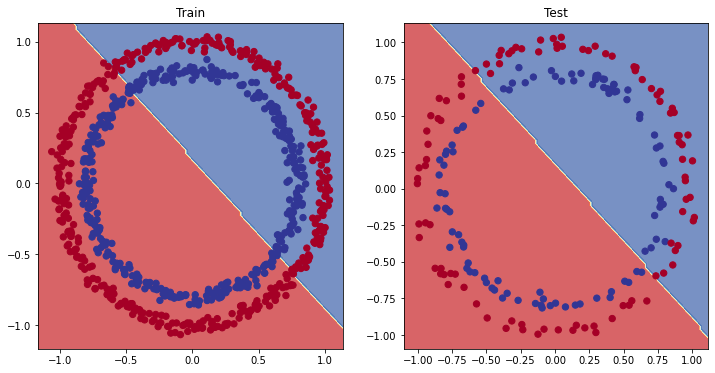

In [30]:
# Plot decision boundary
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_1, X_test, y_test)

## 5. Improving our model

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

These option are all from a model´s perspective because they deal directly with the model, rather than the data.

And because these options are all values we (as machine learning engineers and data scientist) can change, they are referred as hyperparameters.

Let´s try and improve our model by:
* Adding more hidden units : 5 --> 10
* Increase the number of layers: 2 --> 3
* Increase the number of epochs: 100 --> 1000

In [31]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features = 2,out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear( in_features = 10, out_features = 1)
  
  def forward(self, x):
    #z = self.layer_1(x)
    #z = self.layer_2(z)
    #z = self.layer_3(z) # one option
    return self.layer_3(self.layer_2(self.layer_1(x))) # this way to write operation leverages ups where possible behind the scenes

model_2 = CircleModelV2()
model_2

                           

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [32]:
model_2.state_dict()

OrderedDict([('layer_1.weight', tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, 

In [33]:
# 1. Create a loss function and an Optimizer
loss_func = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params = model_2.parameters(),
                             lr = 0.0001)

# Write a training and evaluation loop

In [34]:
# Train
torch.manual_seed(42)
torch.cuda.manual_seed(42)
EPOCHS = 1000
model_2.to(device)
# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


for epoch in range(EPOCHS):
  model_2.train()
  # 1. Forward pass
  y_logits = model_2(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  # 2. Calculate the loss
  train_loss = loss_func(y_logits,y_train)
  train_acc = accuracy_fn(y_true = y_train, y_pred = y_pred)
  # 3. Zero grad
  optimizer.zero_grad()
  # 4. Loss backward (backpropagation)
  train_loss.backward()
  # 5. step
  optimizer.step()

  # Testing
  # 1. Forward pass
  model_2.eval()
  with torch.inference_mode():
  # 1.Forward pass
    y_logits_test = model_2(X_test).squeeze()
    y_test_pred = torch.round(torch.sigmoid(y_logits_test))
  # 2. Calculate the loss
    test_loss = loss_func(y_logits_test, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=y_test_pred)
  
  # Print out what´s happening
    if epoch % 50 == 0 :
      print(f'Epoch:{epoch} - Train loss: {train_loss} - Train acc:{train_acc} | test loss: {train_loss} - test acc: {test_acc} ')

Epoch:0 - Train loss: 0.6939550638198853 - Train acc:50.875 | test loss: 0.6939550638198853 - test acc: 51.0 
Epoch:50 - Train loss: 0.6934033036231995 - Train acc:50.0 | test loss: 0.6934033036231995 - test acc: 48.5 
Epoch:100 - Train loss: 0.6931471824645996 - Train acc:49.875 | test loss: 0.6931471824645996 - test acc: 52.0 
Epoch:150 - Train loss: 0.6930362582206726 - Train acc:51.125 | test loss: 0.6930362582206726 - test acc: 46.5 
Epoch:200 - Train loss: 0.6929953098297119 - Train acc:51.125 | test loss: 0.6929953098297119 - test acc: 47.0 
Epoch:250 - Train loss: 0.6929831504821777 - Train acc:51.24999999999999 | test loss: 0.6929831504821777 - test acc: 46.0 
Epoch:300 - Train loss: 0.6929804086685181 - Train acc:51.37500000000001 | test loss: 0.6929804086685181 - test acc: 45.0 
Epoch:350 - Train loss: 0.6929798722267151 - Train acc:51.37500000000001 | test loss: 0.6929798722267151 - test acc: 45.0 
Epoch:400 - Train loss: 0.6929798722267151 - Train acc:51.125 | test loss: 0

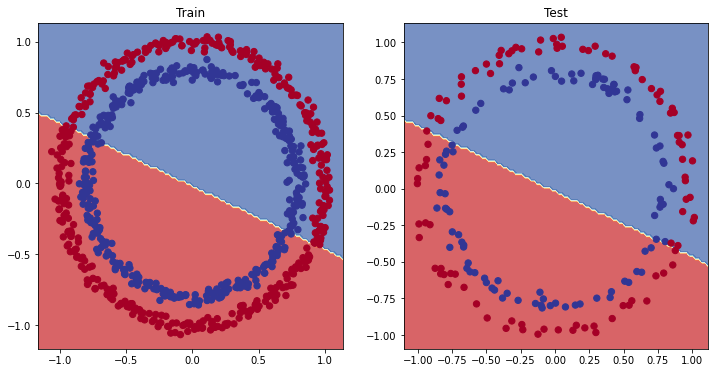

In [35]:
# Plot decision boundary
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_2, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test ut a smaller problem

In [36]:
# Create some data (same as notebook 01)

weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data

X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]), tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [37]:
# 
train_split = int(0.8 * len(X_regression))
X_train, y_train = X_regression[:train_split] , y_regression[:train_split]
X_test, y_test = X_regression[train_split:] , y_regression[train_split:]

In [38]:
print(f'Lenghts of training dataset: {len(X_train)} - {len(y_train)}')
print(f'Lenghts of test dataset: {len(X_test)} - {len(y_test)}')


Lenghts of training dataset: 80 - 80
Lenghts of test dataset: 20 - 20


In [39]:
X_train[:5] , y_train[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]), tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

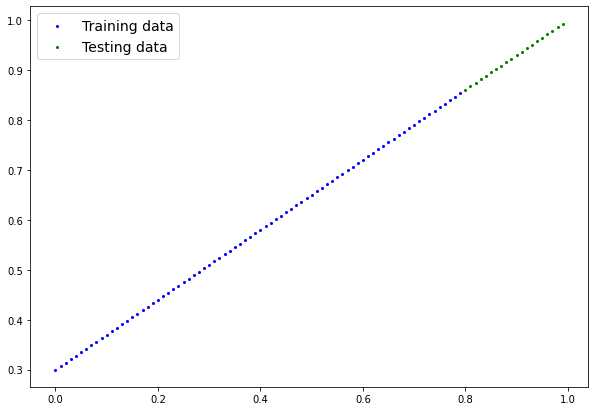

In [40]:
plot_predictions(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test)

### 5.2 Adjusting model_2 to fit a straight line

In [41]:
# Same archichecture as model_1 but using nn.Sequential()
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)

).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [42]:
# Loss and optimizer

loss_func= nn.L1Loss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.001)

In [43]:
# Train the modle
torch.manual_seed(42)
torch.cuda.manual_seed(42)
EPOCHS = 1000

# Put the data into the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Train
for epoch in range(EPOCHS):
  # Train
  model_2.train()
  # 1. Foward pass
  y_pred = model_2(X_train)
  # 2. Loss
  loss = loss_func(y_pred, y_train)
  # 3. Zero grad
  optimizer.zero_grad()
  # backward
  loss.backward()
  # step
  optimizer.step()

  #Testing
  model_2.eval()
  with torch.inference_mode():
    y_test_pred = model_2(X_test)
    test_loss = loss_func(y_test_pred,y_test)

  # Print out what´s happening
  if epoch % 50 == 0:
    print(f'Epoch: {epoch} - train loss: {loss} | test loss : {test_loss}')



Epoch: 0 - train loss: 0.7598584890365601 | test loss : 0.9496515989303589
Epoch: 50 - train loss: 0.5766465067863464 | test loss : 0.7409380674362183
Epoch: 100 - train loss: 0.4027175009250641 | test loss : 0.5402894616127014
Epoch: 150 - train loss: 0.23190395534038544 | test loss : 0.3404245972633362
Epoch: 200 - train loss: 0.05876145511865616 | test loss : 0.1347997784614563
Epoch: 250 - train loss: 0.021560516208410263 | test loss : 0.05143337696790695
Epoch: 300 - train loss: 0.014611686579883099 | test loss : 0.033422283828258514
Epoch: 350 - train loss: 0.007512912154197693 | test loss : 0.017005586996674538
Epoch: 400 - train loss: 0.0030826411675661802 | test loss : 8.408426947426051e-05
Epoch: 450 - train loss: 0.003140704706311226 | test loss : 0.00015631318092346191
Epoch: 500 - train loss: 0.0030881327111274004 | test loss : 0.00012149810936534777
Epoch: 550 - train loss: 0.003035548608750105 | test loss : 9.829997725319117e-05
Epoch: 600 - train loss: 0.003093429375439

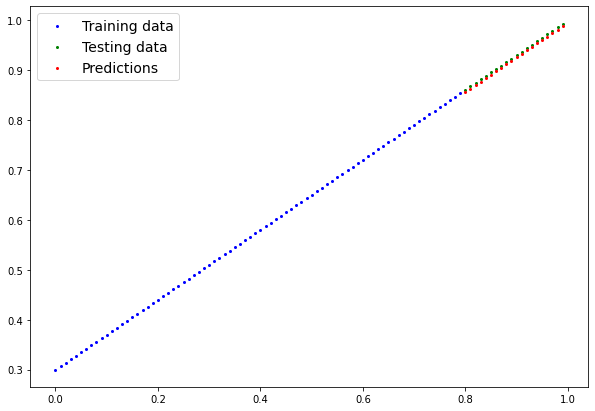

In [44]:
# Turn on Evaluation Mode
model_2.eval()
# Make predictions
with torch.inference_mode():
  y_preds = model_2(X_test)

# Plot data and predictions
plot_predictions(train_data=X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions = y_preds)

## 6. The missing piece: Non-Linearity

" What patters could you draw if you are were given an infinite amount of a straight and non-straight lines?

Or in machine learning terms, an infinite (but really it is finite) of linear and non-linear functions

### 6.1 Recreating non-linear data (red and blue circles)

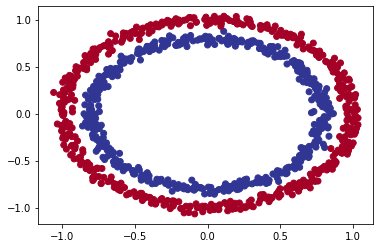

In [45]:
# Make and plot data
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples=n_samples,
                    noise = 0.03,
                    random_state = 42
)

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [46]:
# Convert data to tensor train/test split
import torch
from torch import nn
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state = 42)

### 6.2 Building a model with no linerarity


In [47]:
# Build a model with non-linear function
class CircleModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU()
  def forward(self,x):
    # Where should we put our non-linear activation function?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

device = "cuda" if torch.cuda.is_available() else "cpu"
model_3 = CircleModelV3().to(device)
model_3

CircleModelV3(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [48]:
# Create a loss and a optimizer
loss_func = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(
    params = model_3.parameters(),
    lr = 0.1
)


## 6.3 Training a model

In [49]:
EPOCHS = 100
torch.manual_seed(42)

for epoch in range(EPOCHS):
  model_3.train()
  # 1. Forward pass
  y_preds = model_3(X_train).squeeze()
  y_preds_labels = torch.round(torch.sigmoid(y_preds))
  # 2. Calculate the loss
  train_loss = loss_func(y_preds, y_train)
  train_acc = accuracy_fn(y_true = y_train, y_pred = y_preds_labels)
  # 3. Zero grads
  optimizer.zero_grad()
  # 4. backward pass
  train_loss.backward()
  # 5. step
  optimizer.step()

  # Test
  model_3.eval()
  with torch.inference_mode():
    y_test_pred = model_3(X_test).squeeze()
    y_test_labels = torch.round(torch.sigmoid(y_test_pred)).squeeze()
    #Calculate the loss
    test_loss = loss_func(y_test_pred, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = y_test_labels)
    # Show the results
    if epoch % 20 == 0:

      print(f'Epoc:{epoch} - train loss: {train_loss:.4f} - train accuracy: {train_acc} test loss {test_loss:.4} - test acc: {test_acc}')


Epoc:0 - train loss: 0.6929 - train accuracy: 50.0 test loss 0.6939 - test acc: 50.0
Epoc:20 - train loss: 0.2035 - train accuracy: 99.375 test loss 0.1983 - test acc: 97.5
Epoc:40 - train loss: 0.0116 - train accuracy: 100.0 test loss 0.02676 - test acc: 99.5
Epoc:60 - train loss: 0.0036 - train accuracy: 100.0 test loss 0.01296 - test acc: 99.5
Epoc:80 - train loss: 0.0022 - train accuracy: 100.0 test loss 0.008572 - test acc: 100.0


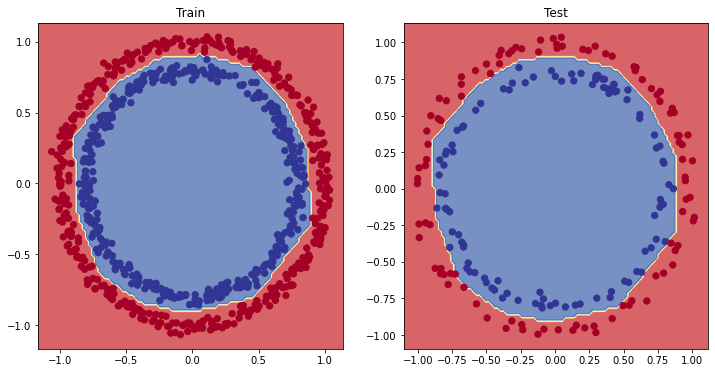

In [50]:
# Plot decision boundary
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_3, X_test, y_test)

## 6.4 Evaluating a model trained with non-linear activations functions

In [51]:
# makes predictions
model_3.eval()

with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10] , y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

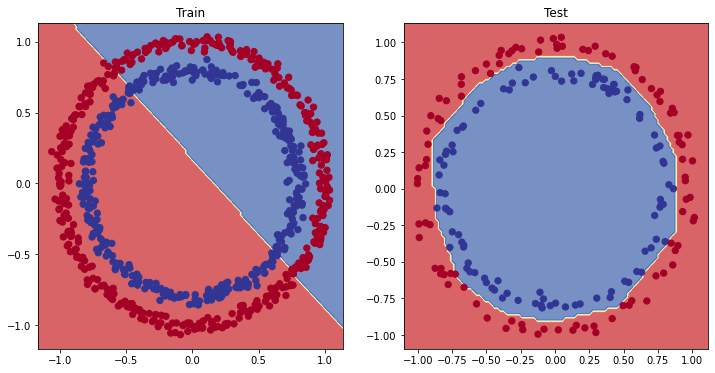

In [52]:
# Plot decision boundaris

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replication non-linear activations functions

Neural networks, rather tan us telling the model what to learn, we give it the tools to discover patterns in data and patterns on its own

And these tools are linear and non-linear funcitons.

In [53]:
# Create a tensor
import torch
A = torch.arange(-10,10,1,dtype=torch.float32)
A.dtype


torch.float32

In [54]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

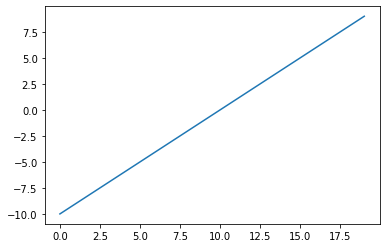

In [55]:
# Visualize the tensor
plt.plot(A)

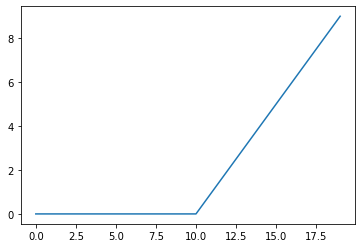

In [56]:
plt.plot(torch.relu(A))

In [57]:
def relu(x: torch.Tensor)-> torch.Tensor:
  return torch.max(torch.tensor(0),x) # inputs musty be tensor

In [58]:
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

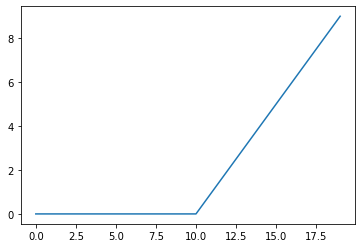

In [59]:
plt.plot(relu(A))

In [60]:
# Sigmoid 
def sigmoid(x: torch.Tensor)->torch.Tensor:
  return 1 / (1+torch.exp(-x))

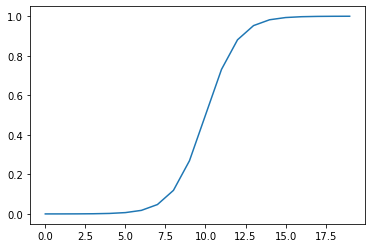

In [61]:
plt.plot(torch.sigmoid(A))

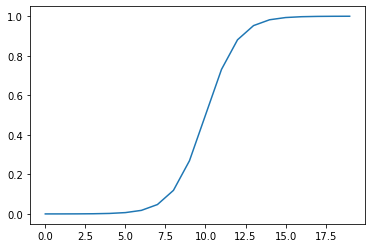

In [62]:
plt.plot(sigmoid(A))

## 8. Putting it all together with a multi-class classification problem

* Binary classification = one thing or another (cat vs dog, spam vs no-spam, etc)
* Multiclass Classification = more than one thing or another (cat vs dog vs tiger)

### 8.1 Creating a toy multi-class dataset

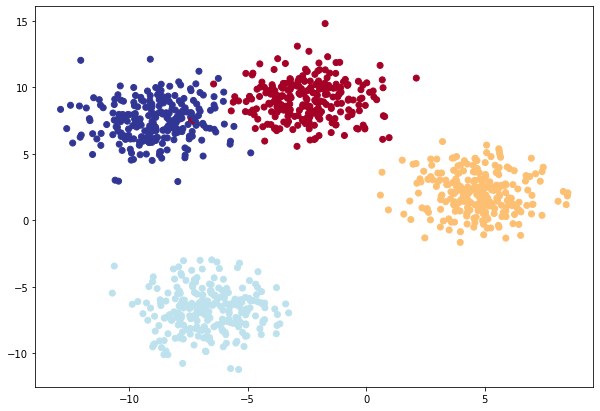

In [168]:
# import dependencies
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creations
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi class data

X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5,
                            random_state = 42) # give the classes randomness

# Turning numpy data into tensors
X, y = torch.from_numpy(X_blob).type(torch.float), torch.from_numpy(y_blob).type(torch.float)

# Split into train test

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

# 4. Plot data (visualize, visualize, visualize)
plt.figure(figsize=(10,7))
plt.scatter(X[:,0],
            X[:,1],
            c=y_blob,
            cmap=plt.cm.RdYlBu)

###  8.2 Building a multi-class classification model PyTorch

In [169]:
# Create device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [170]:
class MultiClassClassificationV1(nn.Module):
  def __init__(self, input_feature, output_features, hidden_units = 8):
    """Initializes multi class classification model.
    Args:
      input_feature (int): Number of input feature to the model.
      output_feature (int): Number of outputs features (number of output classes)
      hidden units (int): Number of hidden units between layers, default 8.
    Returns:
    Example:
    returns:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_feature, out_features = hidden_units),
        #nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        #nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_features),

    )
  def forward(self,x):
    return self.linear_layer_stack(x)
  
# Create a instance of our model and send it to the target device

model_4 = MultiClassClassificationV1(2,4).to(device)
model_4

MultiClassClassificationV1(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Create loss and optimizer

In [171]:
# Create a loss funciton and an optimizer for multiclass classification 

loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params = model_4.parameters(),
    lr = 0.01
)

### 8.4 Getting predictions probabilities for a multi-class PyTorch model

In order to evaluate and train and test our model, we need to convert our model´s
output (logits) to prediction probabilities and then to predicton labels.
Logits --> pred prob (use torch.softmax()) --> Labels (take the argmax in prediction probabilities)

In [172]:
# Let´s get some raw outputs (logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_train)

y_logits[:10] , y_test[:10]

(tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
         [ 0.2210, -1.5439,  0.0420,  1.1531],
         [ 2.8698,  0.9143,  3.3169,  1.4027],
         [ 1.9576,  0.3125,  2.2244,  1.1324],
         [ 0.5458, -1.2381,  0.4441,  1.1804],
         [-0.5073, -1.2865, -0.7239,  0.3814],
         [ 0.6031, -1.6200,  0.4522,  1.5135],
         [-0.9233, -0.5593, -1.0775, -0.4963],
         [ 1.7228, -1.0307,  1.7717,  1.9579],
         [ 0.5619, -1.4183,  0.4359,  1.3289]]),
 tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.]))

In [173]:
# Convert our model´s logits outputs to predictions probabilities
y_pred_prob = torch.softmax(y_logits, dim = 1)
print(y_logits)
print(y_pred_prob)


tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        ...,
        [-0.0148, -1.5722, -0.2221,  0.9874],
        [ 2.3231,  0.6656,  2.6783,  1.1564],
        [ 2.1249, -0.9140,  2.2318,  2.1890]])
tensor([[0.1838, 0.3422, 0.1500, 0.3239],
        [0.2199, 0.0377, 0.1839, 0.5586],
        [0.3406, 0.0482, 0.5326, 0.0785],
        ...,
        [0.2106, 0.0444, 0.1712, 0.5738],
        [0.3415, 0.0651, 0.4871, 0.1063],
        [0.3099, 0.0148, 0.3449, 0.3304]])


In [174]:
# Total sum of each class probabilities
print(torch.sum(y_pred_prob[0]))
# Max probability
print(torch.max(y_pred_prob[0]))
# position of max probability
print(torch.argmax(y_pred_prob[0]))

tensor(1.)
tensor(0.3422)
tensor(1)


In [175]:
# Convert our model´s predictions probabilities to predictions labels
y_preds = torch.argmax(y_pred_prob, dim = 1)
y_preds[:10] , y_train[:10]

(tensor([1, 3, 2, 2, 3, 3, 3, 3, 3, 3]),
 tensor([1., 0., 2., 2., 0., 0., 0., 1., 3., 0.]))

### 8.5 Creating training and test loop for a multi-class PyTorch model

In [176]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# Set epochs
epochs = 1000
# Put the data to the target device
X_train, y_train, = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  # Training 
  model_4.train()
  # 1 forward
  y_logits = model_4(X_train).squeeze()
  y_pred = torch.softmax(y_logits, dim = 1).argmax(dim=1)
  # 2. Calculate the loss
  train_loss = loss_func(y_logits, y_train.type(torch.long))
  train_accuracy = accuracy_fn(y_true=y_train,y_pred = y_pred)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  # Test
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_test).squeeze()
    test_pred = torch.softmax(test_logits, dim = 1).argmax(dim=1)
    test_loss = loss_func(test_logits, y_test.type(torch.long))
    test_accuracy = accuracy_fn(y_test, test_pred)

    if epoch % 100 == 0:
      print(f'Epoch: {epoch} - train loss: {train_loss:.2f} - train acc:{train_acc:.2f} - test loss: {test_loss:.2f} - test accuracy: {test_accuracy:.2f}')

Epoch: 0 - train loss: 1.04 - train acc:100.00 - test loss: 0.96 - test accuracy: 71.00
Epoch: 100 - train loss: 0.15 - train acc:100.00 - test loss: 0.15 - test accuracy: 99.00
Epoch: 200 - train loss: 0.08 - train acc:100.00 - test loss: 0.08 - test accuracy: 99.50
Epoch: 300 - train loss: 0.06 - train acc:100.00 - test loss: 0.05 - test accuracy: 99.50
Epoch: 400 - train loss: 0.05 - train acc:100.00 - test loss: 0.04 - test accuracy: 99.50
Epoch: 500 - train loss: 0.04 - train acc:100.00 - test loss: 0.04 - test accuracy: 99.50
Epoch: 600 - train loss: 0.04 - train acc:100.00 - test loss: 0.03 - test accuracy: 99.50
Epoch: 700 - train loss: 0.04 - train acc:100.00 - test loss: 0.03 - test accuracy: 99.50
Epoch: 800 - train loss: 0.03 - train acc:100.00 - test loss: 0.03 - test accuracy: 99.50
Epoch: 900 - train loss: 0.03 - train acc:100.00 - test loss: 0.02 - test accuracy: 99.50


### 8.5 Creating a training and test loop for a multi-class PyTorch model

### 8.6 Making and evaluation prediction with a PyTorch multi-class model

In [159]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_test)
# View the first 10 predictions
y_logits[:10]

tensor([[  4.2922,  10.2848, -14.8686,  -9.7605],
        [  4.9978, -11.9978,   3.3676,  10.6332],
        [ -5.5231, -13.2642,  20.9665,  12.7714],
        [  1.8175,   7.5129,  -8.5815,  -6.9860],
        [  8.0098,   3.2442, -14.5871,  -3.6407],
        [  5.5682, -14.9003,   4.9926,  13.2453],
        [ -5.9104, -10.1250,  18.8488,   9.9250],
        [  7.0263,  -0.7833,  -9.5487,   0.1484],
        [ -5.5183, -18.4925,  25.4975,  17.5714],
        [  7.2611,   0.6885, -11.1943,  -1.2247]])

In [160]:
# Go from logits --->prediction probabilities 
pred_prob = torch.softmax(y_logits,dim=1)
pred_prob[:10]

tensor([[2.4910e-03, 9.9751e-01, 1.1883e-11, 1.9650e-09],
        [3.5541e-03, 1.4778e-10, 6.9617e-04, 9.9575e-01],
        [3.1306e-12, 1.3604e-15, 9.9972e-01, 2.7593e-04],
        [3.3504e-03, 9.9665e-01, 1.0206e-07, 5.0324e-07],
        [9.9155e-01, 8.4452e-03, 1.5226e-10, 8.6410e-06],
        [4.6298e-04, 5.9733e-13, 2.6037e-04, 9.9928e-01],
        [1.7668e-11, 2.6109e-13, 9.9987e-01, 1.3316e-04],
        [9.9857e-01, 4.0523e-04, 6.3233e-08, 1.0287e-03],
        [3.3872e-14, 7.8565e-20, 9.9964e-01, 3.6104e-04],
        [9.9840e-01, 1.3959e-03, 9.6437e-09, 2.0606e-04]])

In [161]:
# Go from prediction probabilities ----> Labels
y_pred = pred_prob.argmax(dim=1)
y_pred[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

### 8.6 In this case, our data is linearly separable! But in a lot of cases it won´t be like this.

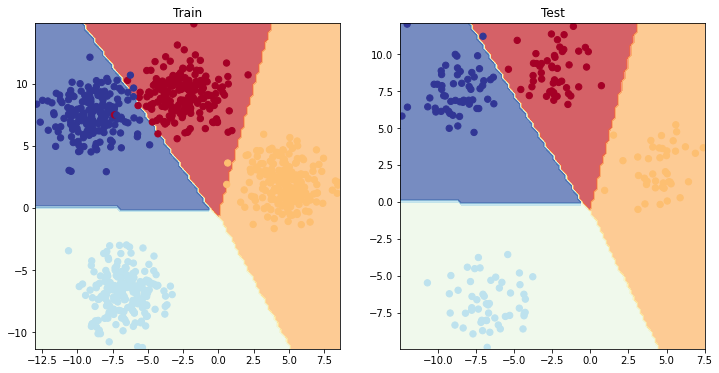

In [162]:
# Plot decision boundari
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_4, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_4, X_test, y_test)

## 9. A few more classification Metrics
To evaluate a classification model

* Accuracy - out of 100 samples, how many does our model get right
* Precision
* Recall 
* F1 - score
* Confusion Matrix
* Classification Report

In [165]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 419 kB 14.5 MB/s 


In [178]:
from torchmetrics import Accuracy
# Setup metric
torchmetric_accuracy = Accuracy().to(device)
torchmetric_accuracy(test_pred, y_test.type(torch.long))

tensor(0.9950)